# Интеллектуальная обработка экспериментальных данных
## Лабораторная работа № 1, 2, & 3
### Задание лабораторной работы

1. Введение и постановка цели (ЛР1)
    1. Внимательно изучить описание выбранного датасета (источник, тематика, структура, назначение).
    2. Сформулировать четкую цель исследования. Цель должна быть измеримой (например: «выявить топ-3 факторов, влияющие на уровень заработной платы») и достижимой в рамках доступных данных.
    3. Определить конкретные исследовательские задачи (например: «провести очистку данных», «построить модель прогнозирования»).
    4. Составить список гипотез, которые можно проверить (например: «пол и возраст влияют на уровень дохода»). Каждая гипотеза должна быть проверяема средствами анализа данных.

2. Предварительный обзор данных (ЛР1)
    1. Изучить документацию к датасету. Ответить на вопросы: откуда данные, как собирались, какие есть ограничения.
    2. Загрузить данные в среду анализа (Python + pandas).
    3. Провести первичный обзор:
        - Определить количество строк и столбцов.
        - Изучить типы данных в каждом столбце.
        - Проверить наличие пропусков и дубликатов.
        - Получить базовые статистики (mean, median, min, max, std).

3. Предобработка данных (ЛР1)
    1. Обработка пропусков: Определяем стратегию (удаление, заполнение средним/медианой, использование специальных меток). Обосновываем выбранный метод. Фиксируем все изменения. 
    2. Работа с дубликатами: Находим повторяющиеся записи. Принимаем и обосновываем решение, стоит ли их удалять.
    3. В конце раздела пишем о своих наблюдениях, отмечаем возможные проблемы, и что с ними нужно сделать заказчику (сборщику данных). Например, проверить функцию записи трудовых дней. Можно сразу выписать рекомендации, например, сделать выпадающий список в форму вместо свободного ввода. 

4. Исследовательский анализ данных (EDA) (ЛР2)
    1. Изучаем распределения признаков:
        - Строим гистограммы.
        - Проверяем нормальность распределений, описываем распределения.
        - Находим и комментируем оставшиеся выбросы.
    2. Проводим корреляционный анализ:
        - Строим корреляционную матрицу.
        - Визуализируем с помощью heatmap.
    3. Ищем закономерностей:
        - Проверяем наличие сезонных или временных паттернов (если набор данных позволяет).

5. Визуализация данных (ЛР3)
    - Основные графики:
        - Гистограммы
        - Боксплоты
        - Scatter plot
        - Heatmap
        - Boxen/violin plot при необходимости
    - Требования к оформлению:
        - У каждого графика — заголовок.
        - Оси подписаны.
        - Легенды понятные, единицы измерения определены.
        - Стиль и цвета должны быть единообразными во всем проекте.

## 1.1 Введение и постановка цели

Выбранный датасет: [Датасет об уязвимостях по системе CVE (Common Vulnerabilities and Exposures)](https://www.kaggle.com/datasets/andrewkronser/cve-common-vulnerabilities-and-exposures?select=cve.csv).

### 1.1.1 Описание датасета
#### Источник
Из описания датасета на сайте:
> The National Cybersecurity FFRDC, operated by the Mitre Corporation, maintains the system, with funding from the National Cyber Security Division of the United States Department of Homeland Security.

Данные для системы CVE собирались корпорацией MITRE, которая владеет *National Cybersecurity FFRDC* (Federally Funded Research and Development Center) 

#### Тематика
CVE (Common Vulnerabilities and Exposures) -- база данных общеизвестных уязвимостей информационной безопасности. В ней каждая уязвимость имеет уникальный CVE-ID (`CVE [год]-[номер]`)

#### Структура
Используем только таблицу `cve.csv`. Остальные нам неинтересны, т. к. содержат слишком мало столбцов и только категориальные номинальные признаки с множеством уникальных значений.

| Признак                  | Тип признака                   | Описание                                                                   |
|--------------------------|--------------------------------|----------------------------------------------------------------------------|
| <безымянный>             | Категориальный, номинальный    | CVE-ID                                                                     |
| `mod_date`               | "Числовой", непрерывный (дата) | Дата последнего изменения записи                                           |
| `pub_date`               | "Числовой", непрерывный (дата) | Дата публикации записи                                                     |
| `cvss`                   | Числовой, непрерывный          | CVSS (Common Vulnerability Scoring System), Basic Score                    |
| `cwe_code`               | Числовой, дискретный           | CWE (Common Weakness Enumeration), код категории                           |
| `cwe_name`               | Категориальный, номинальный    | CWE (Common Weakness Enumeration), имя категории                           |
| `summary`                | Категориальный, номинальный    | Краткое описание уязвимости                                                |
| `access_authentication`  | Категориальный, порядковый     | Параметр `Au` для расчёта CVSS: `{'MULTIPLE', 'SINGLE', 'NONE'}`           |
| `access_complexity`      | Категориальный, порядковый     | Параметр `AC` для расчёта CVSS: `{'LOW', 'MEDIUM', 'HIGH'}`                |
| `access_vector`          | Категориальный, порядковый     | Параметр `AV` для расчёта CVSS: `{'LOCAL', 'ADJACENT_NETWORK', 'NETWORK'}` |
| `impact_availability`    | Категориальный, порядковый     | Параметр `A` для расчёта CVSS: `{'NONE', 'PARTIAL', 'COMPLETE'}`           |
| `impact_confidentiality` | Категориальный, порядковый     | Параметр `C` для расчёта CVSS: `{'NONE', 'PARTIAL', 'COMPLETE'}`           |
| `impact_integrity`       | Категориальный, порядковый     | Параметр `I` для расчёта CVSS: `{'NONE', 'PARTIAL', 'COMPLETE'}`           |

#### Назначение
Собранные в рамках проекта CVE данные могут использоваться для различных задач машинного обучения, в том числе:
- предсказание метрики CVSS Basic Score и её параметров по тексту (использование языковых моделей)
- менее содержательная задача: поскольку даже Base Score -- это сложная, ступенчатая нелинейная функция от приведённых параметров, можно попробовать научить некоторые простые модели машинного обучения (линейная регрессия, логистическая регрессия, ...) приближённо предсказывать CVSS (чтобы демонстративно сравнить: 1. значение в датасете, 2. значение по формуле, 3. предсказанное значение).

$$
Exploitability = 20 \cdot AV \cdot AC \cdot Au
$$
$$
Impact = 10.41 \cdot (1 - (1 - C) \cdot (1 - I) \cdot (1 - A))
$$
$$
f(Impact) = \begin{cases}
0 \text{, if } Impact = 0 \\
1.176 \text{, otherwise}
\end{cases}
$$
$$
BaseScore = \text{roundTo1Decimal}(((0.6 \cdot I) + ((0.4 \cdot E) - 1.5) \cdot f(Impact))
$$

### 1.1.2 Цель исследования
Оценить влияние факторов уязвимостей (`attack_authentication`, `attack_complexity`, ...) и времени публикации на CVSS Basic Score; выявить топ-3 факторов по силе связи с CVSS (коэффициент корреляции).

### 1.1.3 Задачи исследования
- Лаб. 1:
    - Изучить описание датасета (источник, как собирался, ограничения).
    - Загрузить данные, сделать первичный обзор.
    - Выполнить предобработку только в рамках ЛР1: обработать пропуски и дубликаты.
- Лаб. 2:
    - Изучить распределения признаков и описать их.
    - Провести корреляционный анализ с непрерывным `cvss`. Проверить статистические гипотезы.
    - Кратко описать возможные временные паттерны (по годам).
- Лаб. 3, 4:
    - Будет заполнено позже, по мере выполнения. 

### 1.1.4 Гипотезы 

- $H_{0}^{(1)}$. Между датой публикации `pub_date` и базовым баллом `cvss` нет монотонной связи. 
    - $H_{1}^{(1)}$. Базовый балл стремится к возрастанию или убыванию с датой публикации.
    - Необходимость проверки обусловлена:
        - В описании датасета не указано, что речь идёт о CVSS v2 и о Basic Score, хотя мы и сделали такое предположение на основе структуры.
        - Возможными несоответствиями версии стандарта, по которому считался балл CVSS. Например, если новые записи считались по CVSS v3 (или v3.1), но для совместимости были использованы метрики со старыми названиями.
        - Другими возможными ошибками, из-за которых значение в датасете будет не равно значению по формуле.
        - Возможными изменениями в подходе к оценке этих базовых метрик, на основе которых рассчитывается Base Score. Например, с течением времени какую-либо из метрик стали оценивать более пессимистично.
    - Можно проверить с помощью критерия Спирмена (корреляция).
- $H_{0}^{(2)}$. Увеличение количества `COMPLETE` среди `{impact_integrity, impact_confidentiality, impact_availability}` не увеличивает `cvss`.   
    - $H_{1}^{(2)}$. Чем больше `COMPLETE` среди `{impact_integrity, impact_confidentiality, impact_availability}`, тем выше базовый балл `cvss`. 
    - Можно проверить с помощью критерия Спирмена (корреляция).
- $H_{0}^{(3)}$. Выполняется правило `Impact==0 => BaseScore==0` (`Impact == 0`, когда `impact_integrity == impact_confidentiality == impact_availability == 'NONE'`)
    - $H_{1}^{(3)}$. Найдены нарушения этого правила.
    - Инвариант или биномиальный тест.

## 1.2 Предварительный обзор данных
### 1.2.1 Изучение документации
#### Откуда данные?
Данные взяты из системы CVE, которую поддерживает National Cybersecurity FFRDC, управляемый корпорацией MITRE. Эти данные находятся в публичном доступе.

#### Как собирались?
Добавлением записей в систему CVE занимаются CVE Numbering Authorities (CNA). Главным из них является корпорация MITRE, но эта роль также принадлежит и многим крупным компаниям (Microsoft, Oracle, ...)

#### Ограничения?
- В датасете собраны только записи, опубликованные с 1 января 1999 по 21 ноября 2019. Датасет на Kaggle в последний раз обновлялся 6 лет назад.
- Дата последнего изменения -- с 10 января 2008 по 21 ноября 2019.
- В некоторых записях (таких <1% от общего числа записей) отсутствуют метрики, используемые для вычисления базового балла CVSS v2.
- Возможная утечка данных (Data Leakage), так как базовый балл `cvss` можно вычислить на основе только метрик CVSS, которые здесь также присутствуют. Можно попробовать оценить правильность расчёта (совпадение значения из датасета и рассчитанного по формуле).

### 1.2.2 Загрузка данных
Установка библиотек

In [1]:
!pip install numpy pandas scipy matplotlib seaborn kagglehub


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Скачивание датасета (он будет в сжатом формате)

In [2]:
import kagglehub

# Download only this file; returns the local path
path = kagglehub.dataset_download(
    "andrewkronser/cve-common-vulnerabilities-and-exposures",
    path="cve.csv"
)
print(path)

C:\Users\vadim\.cache\kagglehub\datasets\andrewkronser\cve-common-vulnerabilities-and-exposures\versions\3\cve.csv


Импорт библиотек

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from scipy import stats

Загрузка датасета. Первый столбец без названия, он содержит код CVE для уязвимости, его нужно переименовать:

In [4]:
df = pd.read_csv(path, encoding="utf-8", compression="zip", parse_dates=["mod_date", "pub_date"])

first = df.columns[0]
if (first == "") or str(first).startswith("Unnamed"):
    df.rename(columns={first: "cve_id"}, inplace=True)

Первые 10 строк датасета

In [5]:
df.head(n=10)

,cve_id,mod_date,pub_date,cvss,cwe_code,cwe_name,summary,access_authentication,access_complexity,access_vector,impact_availability,impact_confidentiality,impact_integrity
0,CVE-2019-16548,2019-11-21 15:15:00,2019-11-21 15:15:00,6.8,352,Cross-Site Request Forgery (CSRF),A cross-site request forgery vulnerability in ...,NaN,NaN,NaN,NaN,NaN,NaN
1,CVE-2019-16547,2019-11-21 15:15:00,2019-11-21 15:15:00,4.0,732,Incorrect Permission Assignment for Critical ...,Missing permission checks in various API endpo...,NaN,NaN,NaN,NaN,NaN,NaN
2,CVE-2019-16546,2019-11-21 15:15:00,2019-11-21 15:15:00,4.3,639,Authorization Bypass Through User-Controlled Key,Jenkins Google Compute Engine Plugin 4.1.1 and...,NaN,NaN,NaN,NaN,NaN,NaN
3,CVE-2013-2092,2019-11-20 21:22:00,2019-11-20 21:15:00,4.3,79,Improper Neutralization of Input During Web P...,Cross-site Scripting (XSS) in Dolibarr ERP/CRM...,NaN,NaN,NaN,NaN,NaN,NaN
4,CVE-2013-2091,2019-11-20 20:15:00,2019-11-20 20:15:00,7.5,89,Improper Neutralization of Special Elements u...,SQL injection vulnerability in Dolibarr ERP/CR...,NaN,NaN,NaN,NaN,NaN,NaN
5,CVE-2013-1817,2019-11-20 20:15:00,2019-11-20 20:15:00,5.0,200,Information Exposure,MediaWiki before 1.19.4 and 1.20.x before 1.20...,NaN,NaN,NaN,NaN,NaN,NaN
6,CVE-2013-1816,2019-11-20 20:15:00,2019-11-20 20:15:00,5.0,20,Improper Input Validation,MediaWiki before 1.19.4 and 1.20.x before 1.20...,NaN,NaN,NaN,NaN,NaN,NaN
7,CVE-2012-1257,2019-11-20 20:15:00,2019-11-20 20:15:00,2.1,319,Cleartext Transmission of Sensitive Information,Pidgin 2.10.0 uses DBUS for certain cleartext ...,NaN,NaN,NaN,NaN,NaN,NaN
8,CVE-2011-4455,2019-11-20 20:10:00,2019-11-20 19:15:00,4.3,79,Improper Neutralization of Input During Web P...,Multiple cross-site scripting vulnerabilities ...,NaN,NaN,NaN,NaN,NaN,NaN
9,CVE-2011-4454,2019-11-20 20:10:00,2019-11-20 19:15:00,4.3,79,Improper Neutralization of Input During Web P...,Multiple cross-site scripting vulnerabilities ...,NaN,NaN,NaN,NaN,NaN,NaN


Описание столбцов датасета, с основными статистическими метриками

In [6]:
df.describe(include="all")

,cve_id,mod_date,pub_date,cvss,cwe_code,cwe_name,summary,access_authentication,access_complexity,access_vector,impact_availability,impact_confidentiality,impact_integrity
count,89660,89660,89660,89660.000000,89660.000000,89660,89660,88776,88776,88776,88776,88776,88776
unique,89660,NaN,NaN,NaN,NaN,170,87432,3,3,3,3,3,3
top,CVE-2007-3004,NaN,NaN,NaN,NaN,Improper Restriction of Operations within the...,A remote code execution vulnerability was iden...,NONE,LOW,NETWORK,PARTIAL,PARTIAL,PARTIAL
freq,1,NaN,NaN,NaN,NaN,12344,83,76777,45746,76104,35991,42039,46357
mean,NaN,2017-09-26 16:10:18.163952640,2015-03-10 06:07:30.900067072,6.021429,199.690854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2008-01-10 05:00:00,1999-01-01 05:00:00,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2017-07-14 14:51:45,2012-04-25 10:10:00,4.300000,79.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2018-03-05 15:56:30,2016-08-08 01:59:00,5.800000,119.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2019-04-05 18:16:30,2018-06-17 16:29:00,7.500000,284.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,2019-11-21 15:15:00,2019-11-21 15:15:00,10.000000,1188.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Информация о столбцах, их типах данных и числе non-null записей

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89660 entries, 0 to 89659
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   cve_id                  89660 non-null  object        
 1   mod_date                89660 non-null  datetime64[ns]
 2   pub_date                89660 non-null  datetime64[ns]
 3   cvss                    89660 non-null  float64       
 4   cwe_code                89660 non-null  int64         
 5   cwe_name                89660 non-null  object        
 6   summary                 89660 non-null  object        
 7   access_authentication   88776 non-null  object        
 8   access_complexity       88776 non-null  object        
 9   access_vector           88776 non-null  object        
 10  impact_availability     88776 non-null  object        
 11  impact_confidentiality  88776 non-null  object        
 12  impact_integrity        88776 non-null  object

### 1.2.3 Первичный обзор данных

Подсчёт числа строк с NA:

In [8]:
print('Count of NA values per column:')
for column in df.columns:
    na_count = df.isna()[column].sum()
    if na_count > 0:
        print(f'- {column}: {na_count} ({(na_count / df.shape[0] * 100):.2f}%)')
na_total_count = df.isna().any(axis=1).sum()
print(f'Count of all rows with any NA values: {na_total_count} of {df.shape[0]} ({(na_total_count / df.shape[0] * 100):.2f}%)')

Count of NA values per column:
- access_authentication: 884 (0.99%)
- access_complexity: 884 (0.99%)
- access_vector: 884 (0.99%)
- impact_availability: 884 (0.99%)
- impact_confidentiality: 884 (0.99%)
- impact_integrity: 884 (0.99%)
Count of all rows with any NA values: 884 of 89660 (0.99%)


Подсчёт числа дубликатов:

In [9]:
print(f'''
Exact duplicates: {df.duplicated().sum()}
Duplicates by key: {df["cve_id"].duplicated().sum()}
Unique values count: {df["cve_id"].nunique()} ({df["cve_id"].nunique() / df.shape[0] * 100:.2f}%)
''')


Exact duplicates: 0
Duplicates by key: 0
Unique values count: 89660 (100.00%)



Первичная визуализация:

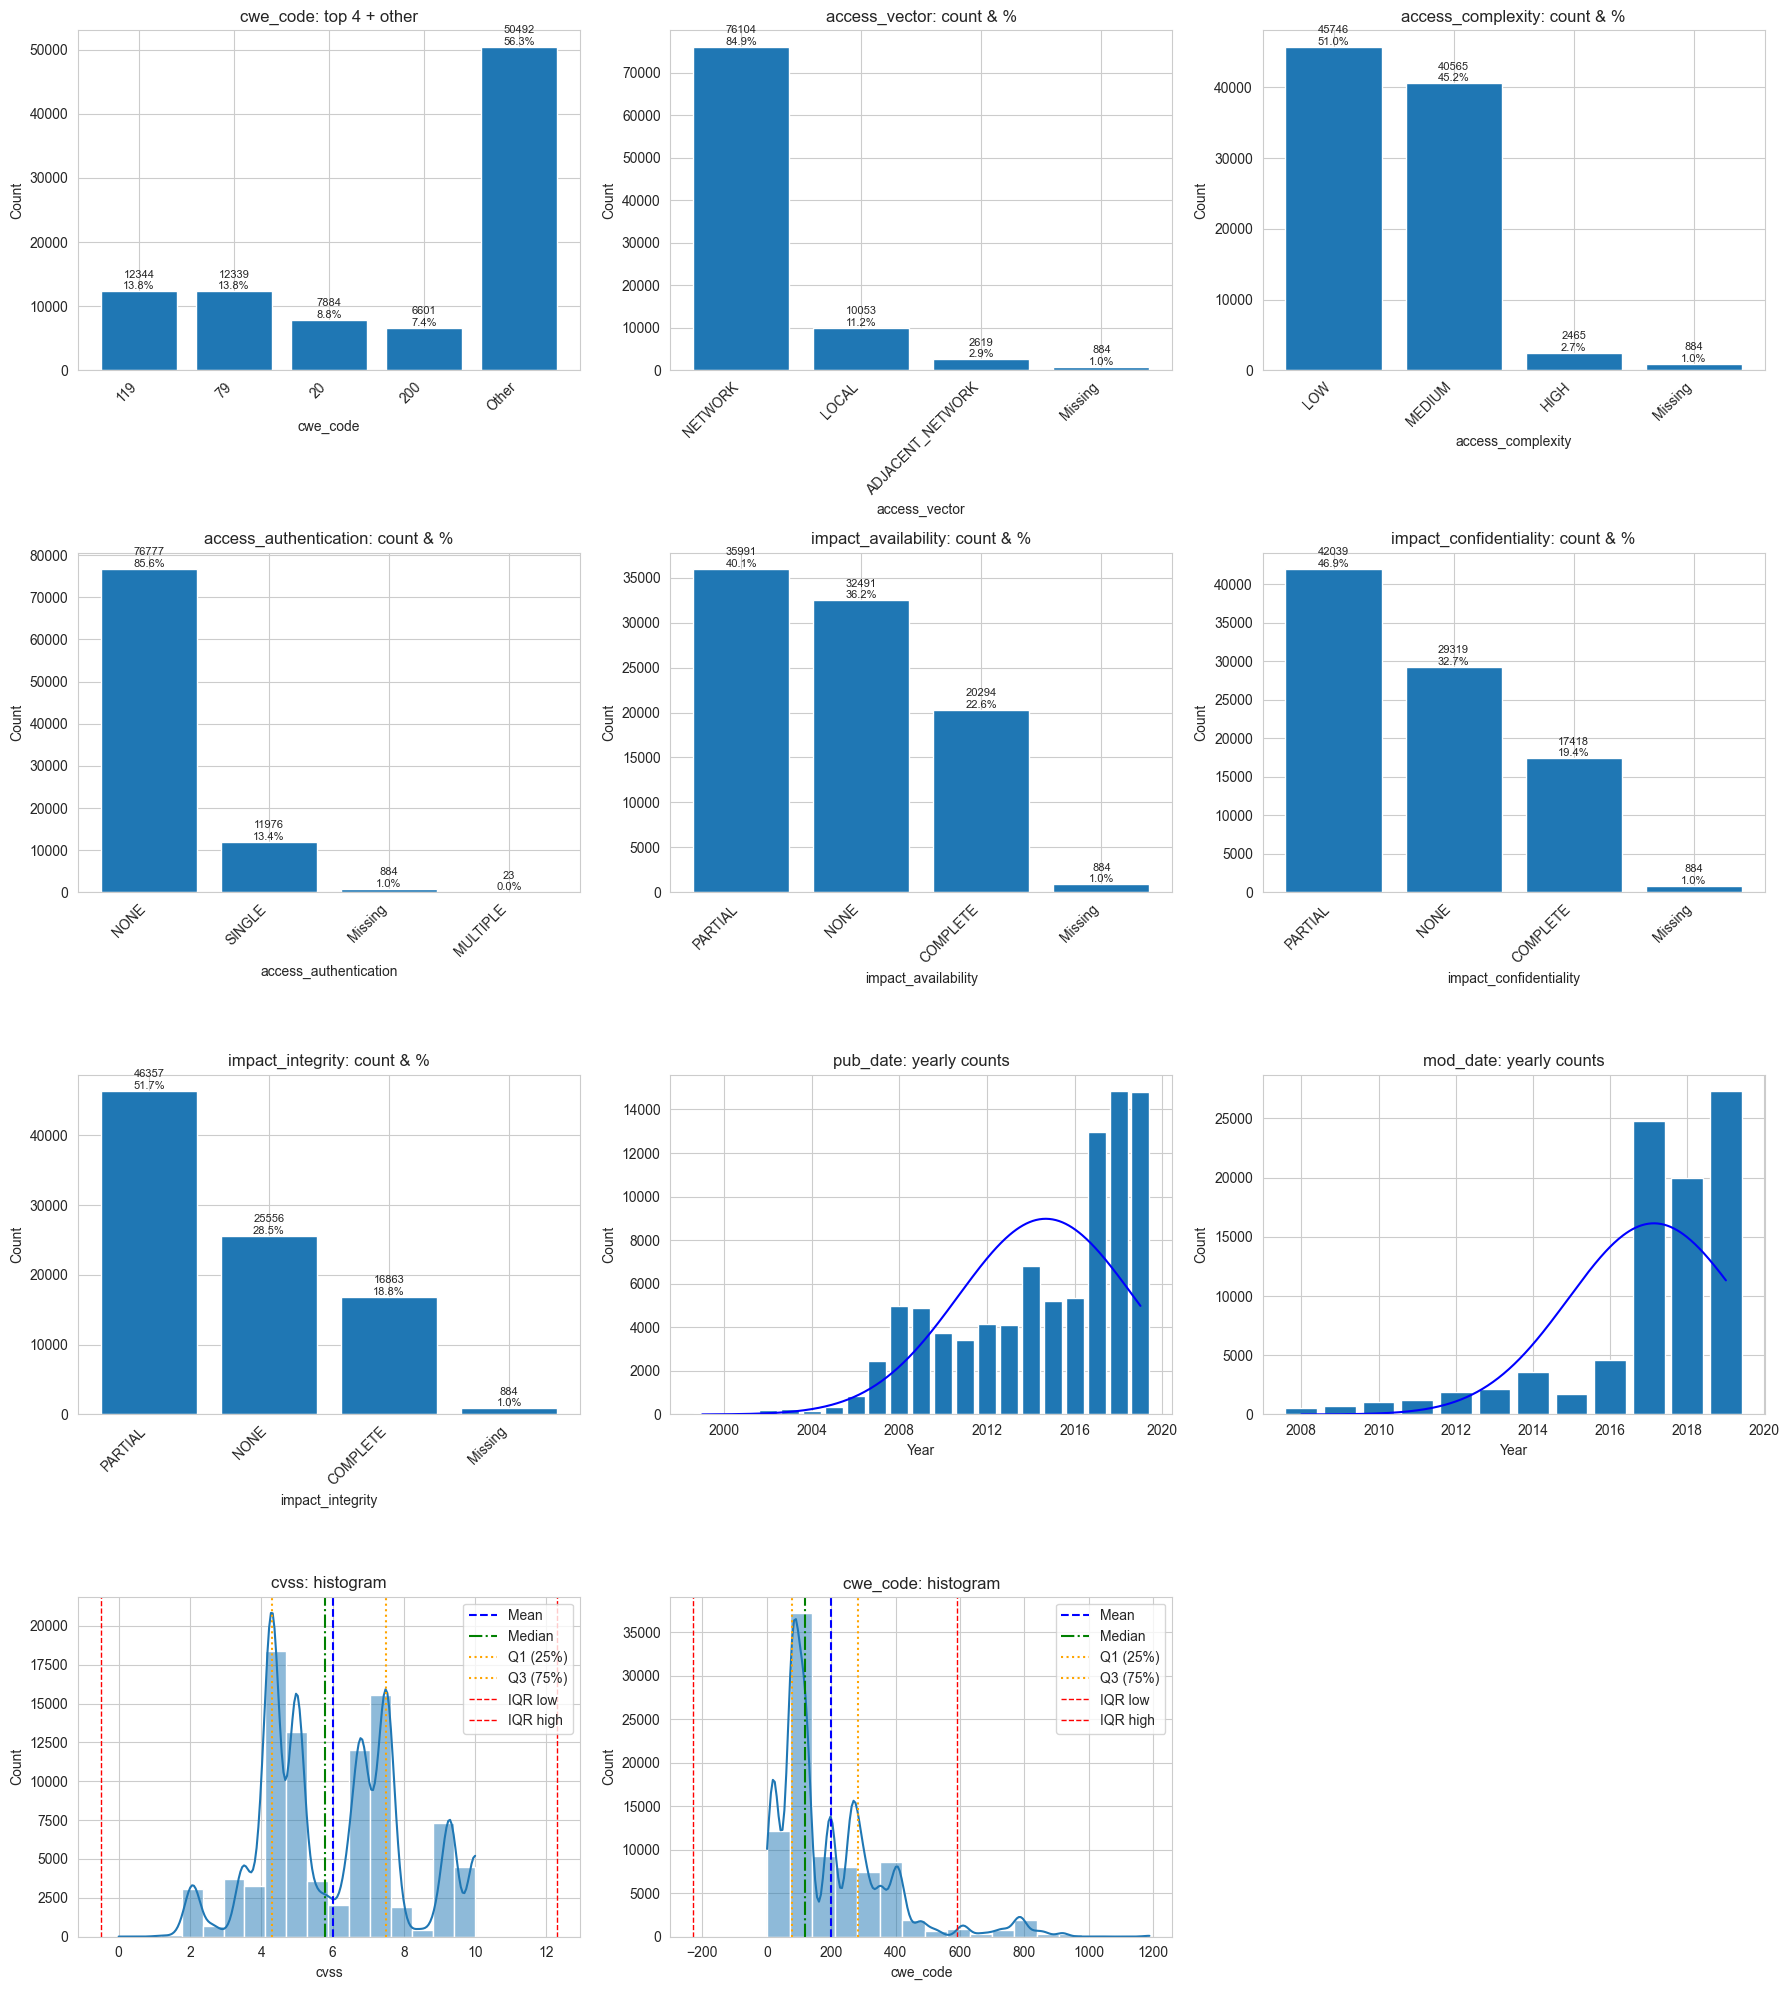

In [10]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, math

def sturges(n: int) -> int:  # you provided this
    return int(np.floor(np.log2(max(n,1)) + 1))

def norm_function(x: np.float64, mean: np.float64, std: np.float64) -> np.float64:
    return (1 / np.sqrt(2 * np.pi) / std) * np.exp((-(x - mean) ** 2) / (2 * std ** 2))

viz_types = {
    "str_many": ["cwe_code"],
    "str_few": [
        "access_vector",
        "access_complexity",
        "access_authentication",
        "impact_availability",
        "impact_confidentiality",
        "impact_integrity",
    ],
    "date": ["pub_date","mod_date"],
    "numeric": ["cvss", "cwe_code"],
}
TOP_N, TRUNC, NUM_COLS = 4, 24, 3

def _annot(ax, vals, total):
    for i, v in enumerate(vals):
        pct = (v/total*100) if total else 0
        ax.text(i, v, f"{int(v)}\n{pct:.1f}%", ha="center", va="bottom", fontsize=8)

def plot_numeric(ax, s, name, norm=False, stats=True) -> dict[str, float] | None:
    x = pd.to_numeric(s, errors="coerce").dropna().values
    if x.size == 0:
        ax.text(0.5, 0.5, "No numeric data", ha="center", va="center", transform=ax.transAxes)
        ax.set_title(f"{name}: histogram")
        return {}

    nbins = sturges(x.size)

    # Histogram
    if norm:
        # use matplotlib's hist so we can grab bin edges for a scaled normal overlay
        n, bins, _ = ax.hist(x, bins=nbins)
    else:
        # use seaborn when no normal overlay is requested
        sns.histplot(x=x, bins=nbins, stat="count", ax=ax, kde=True)
        bins = None  # not needed unless norm is True

    ax.set_title(f"{name}: histogram")
    ax.set_xlabel(name); ax.set_ylabel("Count")

    # Gaussian overlay (scaled to histogram counts) only when norm=True
    if norm and x.size > 1:
        mean = x.mean()
        std = x.std(ddof=0)
        if std > 0 and bins is not None:
            xs = np.linspace(x.min(), x.max(), 400)
            bin_w = np.diff(bins).mean()
            ax.plot(xs, norm_function(xs, mean, std) * x.size * bin_w,
                    lw=2, label="Normal fit", color="blue")

    out = {}
    if stats and x.size > 1:
        q1, q2, q3 = np.percentile(x, [25, 50, 75])
        iqr = q3 - q1
        low = q1 - 1.5*iqr
        high = q3 + 1.5*iqr
        mean = x.mean()

        # vertical guides
        def vline(val, label, style):
            ax.axvline(val, **style, label=label)

        vline(mean, "Mean",   dict(ls="--", lw=1.5, color="blue"))
        vline(q2,   "Median", dict(ls="-.", lw=1.5, color="green"))
        vline(q1,   "Q1 (25%)", dict(ls=":", lw=1.5, color="orange"))
        vline(q3,   "Q3 (75%)", dict(ls=":", lw=1.5, color="orange"))
        vline(low,  "IQR low", dict(ls="--", lw=1, color="red"))
        vline(high, "IQR high", dict(ls="--", lw=1, color="red"))

        ax.legend(loc="best")

        out = {
            "count": int(x.size),
            "mean": float(mean),
            "std": float(x.std(ddof=0)),
            "min": float(x.min()),
            "q1": float(q1),
            "median": float(q2),
            "q3": float(q3),
            "max": float(x.max()),
            "iqr": float(iqr),
            "iqr_low": float(low),
            "iqr_high": float(high),
        }

    return out

def plot_date(ax, s, name, norm=True):
    y = s.dt.to_period("Y").dropna()
    vc = y.value_counts().sort_index()
    x = vc.index.to_timestamp()
    ax.bar(x, vc.values, width=300)  # ~300 days so bars are visible
    ax.set_title(f"{name}: yearly counts")
    ax.set_xlabel("Year")
    ax.set_ylabel("Count")

    if norm and len(vc) > 1:
        w = vc.values.astype(float)
        x_num = mdates.date2num(x)          # days as float
        N = w.sum()
        mu = (w * x_num).sum() / N
        sigma = np.sqrt((w * (x_num - mu) ** 2).sum() / N)
        if sigma > 0:
            xs = np.linspace(x_num.min(), x_num.max(), 400)
            bin_w = np.mean(np.diff(x_num)) if len(x_num) > 1 else 365.25
            ys = norm_function(xs, mu, sigma) * N * bin_w  # scale PDF to counts
            ax.plot(mdates.num2date(xs), ys, color="blue")

def plot_str_few(ax, s, name):
    vc = s.astype("string").fillna("Missing").value_counts()
    labels = list(vc.index.astype(str))
    vals = vc.values; total = int(vc.sum())
    ax.bar(range(len(labels)), vals)
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=45, ha="right")
    ax.set_title(f"{name}: count & %")
    ax.set_xlabel(name)
    ax.set_ylabel("Count")
    _annot(ax, vals, total)

def plot_str_many(ax, s, name, k=TOP_N, trunc=TRUNC):
    vc = s.astype("string").fillna("Missing").value_counts()
    if len(vc) <= k:
        labels, vals = list(vc.index.astype(str)), vc.values
    else:
        top, other = vc.iloc[:k], vc.iloc[k:].sum()
        labels, vals = list(top.index.astype(str)), np.append(top.values, other)
        labels += ["Other"]
    labels = [lbl[:trunc] + ("…" if len(lbl) > trunc else "") for lbl in labels]
    total = int(vc.sum())
    ax.bar(range(len(labels)), vals)
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=45, ha="right")
    ax.set_title(f"{name}: top {k} + other")
    ax.set_xlabel(name); ax.set_ylabel("Count")
    _annot(ax, vals, total)

plotter = {
    "numeric": plot_numeric,
    "date": plot_date,
    "str_few": plot_str_few,
    "str_many": plot_str_many,
}

specs = [(kind, col) for kind, cols in viz_types.items() for col in cols if col in df.columns]
n = len(specs)
nrows = math.ceil(n/NUM_COLS)
fig, axes = plt.subplots(nrows=nrows, ncols=NUM_COLS, figsize=(NUM_COLS*6, nrows*5))
axes = np.ravel(axes)

for ax, (kind, col) in zip(axes, specs):
    plotter[kind](ax, df[col], col)

# hide any unused axes
for ax in axes[len(specs):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

Заодно проверим, совпадает ли расчётный СVSS v2 Basic Score со значениями из датасета

In [11]:
from decimal import Decimal, ROUND_HALF_UP
from typing import Literal

AccessVector = Literal["LOCAL", "ADJACENT_NETWORK", "NETWORK"]
AccessComplexity = Literal["LOW", "MEDIUM", "HIGH"]
AccessAuthentication = Literal["MULTIPLE", "SINGLE", "NONE"]
ImpactLevel = Literal["NONE", "PARTIAL", "COMPLETE"]

AV_W: dict[AccessVector, Decimal] = {
    "LOCAL": Decimal("0.395"),
    "ADJACENT_NETWORK": Decimal("0.646"),
    "NETWORK": Decimal("1.0"),
}
AC_W: dict[AccessComplexity, Decimal] = {
    "HIGH": Decimal("0.35"),
    "MEDIUM": Decimal("0.61"),
    "LOW": Decimal("0.71"),
}
AU_W: dict[AccessAuthentication, Decimal] = {
    "MULTIPLE": Decimal("0.45"),
    "SINGLE": Decimal("0.56"),
    "NONE": Decimal("0.704"),
}
IMPACT_W: dict[ImpactLevel, Decimal] = {
    "NONE": Decimal("0.0"),
    "PARTIAL": Decimal("0.275"),
    "COMPLETE": Decimal("0.660"),
}

def cvss_v2_basic_score_precise(
        access_vector: AccessVector,
        access_complexity: AccessComplexity,
        access_authentication: AccessAuthentication,
        impact_confidentiality: ImpactLevel,
        impact_integrity: ImpactLevel,
        impact_availability: ImpactLevel,
) -> Decimal:
    av = AV_W[access_vector.upper()]
    ac = AC_W[access_complexity.upper()]
    au = AU_W[access_authentication.upper()]
    c = IMPACT_W[impact_confidentiality.upper()]
    i = IMPACT_W[impact_integrity.upper()]
    a = IMPACT_W[impact_availability.upper()]
    
    _ZERO = Decimal("0")
    _ONE = Decimal("1")
    _TEN = Decimal("10")

    def _round1(x: Decimal) -> Decimal:
        """Round to one decimal place using half-up (matches common CVSS calculators)."""
        return x.quantize(Decimal("0.1"), rounding=ROUND_HALF_UP)
    
    exploitability = Decimal("20") * av * ac * au
    impact = Decimal("10.41") * (_ONE - (_ONE - c) * (_ONE - i) * (_ONE - a))
    f_impact = _ZERO if impact == _ZERO else Decimal("1.176")
    base_score = _round1(
        (
            Decimal("0.6") * impact +
            Decimal("0.4") * exploitability -
            Decimal("1.5")
        ) * f_impact
    )
    base_score = max(_ZERO, min(base_score, _TEN))
    return base_score

_record = df[(~df.isna()).all(axis=1)].iloc[0]
f'''Calculated score: {
    _record['cvss']
}, Dataset score: {
    cvss_v2_basic_score_precise(
        access_authentication=_record['access_authentication'],
        access_complexity=_record['access_complexity'],
        access_vector=_record['access_vector'],
        impact_confidentiality=_record['impact_confidentiality'],
        impact_integrity=_record['impact_integrity'],
        impact_availability=_record['impact_availability']
    )
}'''

'Calculated score: 7.8, Dataset score: 7.8'

In [12]:
df2 = df.copy(deep=True).dropna()
df2['cvss_calculated'] = df2.apply(
    lambda row: cvss_v2_basic_score_precise(
            access_authentication=row['access_authentication'],
            access_complexity=row['access_complexity'],
            access_vector=row['access_vector'],
            impact_confidentiality=row['impact_confidentiality'],
            impact_integrity=row['impact_integrity'],
            impact_availability=row['impact_availability']
    ),
    axis=1
)
df2['cvss_mismatch'] = df2['cvss_calculated'] != df2['cvss'].map(lambda num: Decimal(str(num)).quantize(Decimal("0.1"), rounding=ROUND_HALF_UP))
_cvss_mismatch_count = df2['cvss_mismatch'].sum()
print(f"CVSS mismatches: {_cvss_mismatch_count} ({(_cvss_mismatch_count / df2.shape[0] * 100):.3f}%)")
df2[df2['cvss_mismatch']]

CVSS mismatches: 6 (0.007%)


,cve_id,mod_date,pub_date,cvss,cwe_code,cwe_name,summary,access_authentication,access_complexity,access_vector,impact_availability,impact_confidentiality,impact_integrity,cvss_calculated,cvss_mismatch
2423,CVE-2019-1369,2019-10-11 15:07:00,2019-10-10 14:15:00,2.1,200,Information Exposure,An information disclosure vulnerability exists...,NONE,LOW,NETWORK,NONE,PARTIAL,NONE,5.0,True
3071,CVE-2019-4093,2019-10-09 23:50:00,2019-04-02 14:29:00,3.6,284,Improper Access Control,IBM Tivoli Storage Manager (IBM Spectrum Prote...,SINGLE,LOW,LOCAL,NONE,PARTIAL,PARTIAL,3.2,True
18384,CVE-2019-0090,2019-06-21 03:15:00,2019-05-17 16:29:00,4.4,284,Improper Access Control,Insufficient access control vulnerability in s...,NONE,LOW,LOCAL,PARTIAL,PARTIAL,PARTIAL,4.6,True
21020,CVE-2019-2638,2019-05-03 20:29:00,2019-04-23 19:32:00,6.5,284,Improper Access Control,Vulnerability in the Oracle General Ledger com...,SINGLE,LOW,NETWORK,NONE,PARTIAL,PARTIAL,5.5,True
21021,CVE-2019-2633,2019-05-03 20:29:00,2019-04-23 19:32:00,6.5,284,Improper Access Control,Vulnerability in the Oracle Work in Process co...,SINGLE,LOW,NETWORK,NONE,PARTIAL,PARTIAL,5.5,True
22158,CVE-2019-0876,2019-04-11 16:23:00,2019-04-09 21:29:00,2.1,200,Information Exposure,An information disclosure vulnerability exists...,NONE,MEDIUM,NETWORK,NONE,PARTIAL,NONE,4.3,True


Как можно видеть, процент ошибок очень мал.

## 1.3 Предобработка данных

### 1.3.1 Поиск и обработка дубликатов
В этом датасете, как уже было проверено, нет полных дубликатов или дубликатов по `cve_id`. Все `cve_id` уникальные:

In [13]:
print(f'''
Exact duplicates: {df.duplicated().sum()}
Duplicates by key: {df["cve_id"].duplicated().sum()}
Unique values count: {df["cve_id"].nunique()} ({df["cve_id"].nunique() / df.shape[0] * 100:.2f}%)
''')


Exact duplicates: 0
Duplicates by key: 0
Unique values count: 89660 (100.00%)



Также проверим, что число уникальных `cwe_name` равно числу уникальных `cwe_code`; что каждому `cwe_code` однозначно соответствует один `cwe_name` и наоборот:

In [14]:
print(f"""cwe_code unique: {df['cwe_code'].nunique()}
cwe_name unique: {df['cwe_name'].nunique()}
(cwe_code, cwe_name) unique: {df[['cwe_code', 'cwe_name']].drop_duplicates().shape[0]}""")

cwe_code unique: 170
cwe_name unique: 170
(cwe_code, cwe_name) unique: 170


### 1.3.2 Обработка отсутствующих значений

Ещё раз проверим отсутствующие значения:

In [15]:
print('Count of NA values per column:')
for column in df.columns:
    na_count = df.isna()[column].sum()
    if na_count > 0:
        print(f'- {column}: {na_count} ({(na_count / df.shape[0] * 100):.2f}%)')
na_total_count = df.isna().any(axis=1).sum()
print(f'Count of all rows with any NA values: {na_total_count} of {df.shape[0]} ({(na_total_count / df.shape[0] * 100):.2f}%)')

Count of NA values per column:
- access_authentication: 884 (0.99%)
- access_complexity: 884 (0.99%)
- access_vector: 884 (0.99%)
- impact_availability: 884 (0.99%)
- impact_confidentiality: 884 (0.99%)
- impact_integrity: 884 (0.99%)
Count of all rows with any NA values: 884 of 89660 (0.99%)


Это говорит, что строк с отсутствующими значениями -- <1% от общего количества. Также, по-видимому, эти значения отсутствуют в одних и тех же строках, судя по количеству.

Посмотрим, как отсутствующие значения распределены по годам:

In [16]:
cols = ["access_authentication","access_complexity","access_vector",
        "impact_availability","impact_confidentiality","impact_integrity"]
m = df[cols].isna().any(axis=1)

year = pd.to_datetime(df["pub_date"], errors="coerce").dt.year
by_year = (pd.DataFrame({"year": year, "missing": m})
           .groupby("year", dropna=False)["missing"]
           .agg(count="count", missing="sum"))
by_year["rate_%"] = 100 * by_year["missing"] / by_year["count"]

overall = 100 * m.mean()
print(by_year.tail(15))
print(f"Overall missing rate: {overall:.2f}%")
# Quick flag: years with missing rate > 3× overall
print("Years >3× overall:", by_year.index[by_year["rate_%"] > 3*overall].tolist())

      count  missing    rate_%
year                          
2005    356        0  0.000000
2006    864        0  0.000000
2007   2435       11  0.451745
2008   4991        5  0.100180
2009   4909        0  0.000000
2010   3755        0  0.000000
2011   3396        0  0.000000
2012   4135        0  0.000000
2013   4125        0  0.000000
2014   6825        0  0.000000
2015   5217        0  0.000000
2016   5325        0  0.000000
2017  12965        1  0.007713
2018  14855        0  0.000000
2019  14800      867  5.858108
Overall missing rate: 0.99%
Years >3× overall: [2019]


Видим, что больше всего пропусков (и по количеству, и в процентном соотношении) в 2019. Пропуски сконцентрированы во времени. Тем не менее, импутацию лучше не применять, т. к. это может существенно ухудшить качество расчёта CVSS (соответствие между датасетом и формулой). Целесообразно взять подмножество датасета и использовать его только там, где нам нужны метрики CVSS.

In [17]:
base_cols = ["access_authentication","access_complexity","access_vector",
             "impact_availability","impact_confidentiality","impact_integrity"]
df_req = df.dropna(subset=base_cols)
assert (df.shape[0] - df_req.shape[0]) == df.isna().any(axis=1).sum()

### 1.3.3 Наблюдения, возможные проблемы
#### Наблюдения
- Датасет содержит 89660 записей. Базовые метрики CVSS v2 (AV, AC, Au, C, I, A) представлены отдельными столбцами.
- Значения в этих столбцах соответствуют допустимым перечислениям CVSS v2 (внеcловарных токенов не обнаружено).
- Пропуски касаются только шести базовых метрик и встречаются в 0.99% строк (884/89660). В данном случае это всегда совместные пропуски всех шести полей в одной записи.
- Есть временная концентрация пропусков: в 2019 г. >5% записей с отсутствующими базовыми метриками при общем уровне 0.99%; в остальные годы доля близка к нулю. Это указывает на вероятные особенности сбора/загрузки именно за этот период.
- Поле `cvss` — числовое (0..10), даты публикации/изменения присутствуют (`pub_date`, `mod_date`). Поля CWE представлены кодом и названием.
- Проверкой подтверждена взаимно-однозначная связь `cwe_code <-> cwe_name` (число уникальных кодов = числу уникальных названий = числу уникальных пар); всего 170 категорий.

#### Возможные проблемы.
- Структурная неполнота по 2019 г. (и некоторым другим годам, но в меньшей степени) может смещать любые анализы, использующие AV/AC/Au/C/I/A (этот год будет недопредставлен).
- Отсутствует указание версии CVSS и подтверждение того, что это Basic Score — это затрудняет проверку согласованности и воспроизводимость расчёта `cvss`. Мы не всегда можем быть уверены, что данные указаны для v2, а не, например, v3 (там появились новые метрики и были переработаны старые, но при вводе данных это могли не учесть).

#### Рекомендации заказчику
- Явно указывать в форме для ввода данных, что метрики нужно использовать именно из v2, тип метрики Base Score.
- На основе введённых параметров рассчитывать Base Score только автоматически, с соблюдением всех правил округления (можно использовать для расчёта `Decimal`/`BigDecimal`/аналоги).
- Документировать источники пропусков за 2019 г. и другие (особенности выгрузки/разметки). В дальнейшем -- по возможности восстановить эти значения при обновлениях данных; если восстановление не планируется, указать причину в описании набора.

## 2.1 Исследовательский анализ данных
### 2.1.1 Изучение распределений признаков

Гистограммы (для числовых признаков и даты) были уже построены ранее.

Здесь отдельно рассмотрим только `cvss`, `pub_date`, `mod_date`.

Проверим нормальность распределения для них (тест Д'Агостино, $K^2$), рассчитаем основные параметры ($\mu$, $\sigma$).

In [18]:
ALPHA = 0.05

for col in ['cvss', 'pub_date', 'mod_date']:
    s = df[col]
    is_dt = np.issubdtype(s.dtype, np.datetime64) or ('date' in col.lower())
    if is_dt:
        dt = pd.to_datetime(s, errors='coerce').dropna().astype('datetime64[s]')
        vals = dt.view('int64').to_numpy()
    else:
        vals = pd.to_numeric(s, errors='coerce').dropna().to_numpy()

    k2, p = stats.normaltest(vals)
    mu, sigma = vals.mean(), vals.std(ddof=0)

    if is_dt:
        mu_str = pd.to_datetime(int(round(mu)), unit='s').strftime('%Y-%m-%d %H:%M:%S')
        print(f"{col}:N={len(vals)}, μ≈{mu_str}, σ≈{sigma:.0f}s; normal? {'YES' if p>ALPHA else 'NO'} (p={p:.3g})")
    else:
        print(f"{col}: N={len(vals)}, μ={mu:.3f}, σ={sigma:.3f}; normal? {'YES' if p>ALPHA else 'NO'} (p={p:.3g})")



cvss: N=89660, μ=6.021, σ=1.995; normal? NO (p=0)
pub_date:N=89660, μ≈2015-03-10 06:07:31, σ≈125255577s; normal? NO (p=0)
mod_date:N=89660, μ≈2017-09-26 16:10:18, σ≈70625931s; normal? NO (p=0)


C:\Users\vadim\AppData\Local\Temp\ipykernel_77176\1633710792.py:8: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  vals = dt.view('int64').to_numpy()
C:\Users\vadim\AppData\Local\Temp\ipykernel_77176\1633710792.py:8: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  vals = dt.view('int64').to_numpy()


Как можем видеть, ни одно из распределений не является нормальным (не можем принять гипотезу о нормальности даже на уровне значимости $\alpha = 0.05$)

Построим графики типа "ящик с усами" для этих признаков, чтобы увидеть медиану, квартили и выбросы:

cvss: N=89660, outliers ↓0 (0.00%), ↑0 (0.00%)
pub_date: N=89660, outliers ↓317 (0.35%), ↑0 (0.00%)
mod_date: N=89660, outliers ↓11138 (12.42%), ↑0 (0.00%)


C:\Users\vadim\AppData\Local\Temp\ipykernel_77176\4276981385.py:8: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  return pd.to_datetime(s, errors='coerce').astype('datetime64[s]').view('int64')  # seconds
C:\Users\vadim\AppData\Local\Temp\ipykernel_77176\4276981385.py:8: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  return pd.to_datetime(s, errors='coerce').astype('datetime64[s]').view('int64')  # seconds


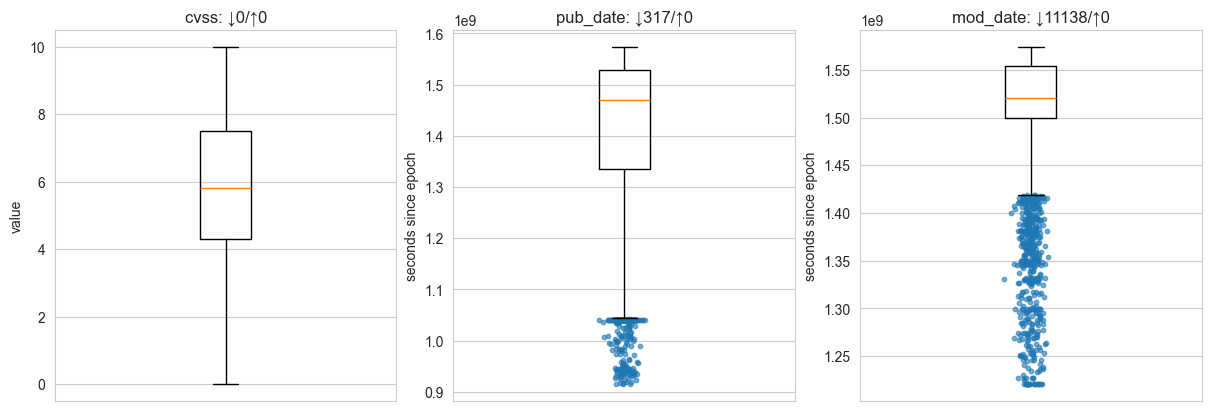

In [19]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt

cols = ['cvss', 'pub_date', 'mod_date']
data = {}

def to_numeric_series(s: pd.Series) -> pd.Series:
    if np.issubdtype(s.dtype, np.datetime64) or ('date' in s.name.lower()):
        return pd.to_datetime(s, errors='coerce').astype('datetime64[s]').view('int64')  # seconds
    return pd.to_numeric(s, errors='coerce')

for c in cols:
    s_num = to_numeric_series(df[c]).dropna()
    q1, q3 = np.percentile(s_num, [25, 75])
    iqr = q3 - q1
    lb, ub = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    below = s_num[s_num < lb]
    above = s_num[s_num > ub]
    data[c] = dict(vals=s_num, lb=lb, ub=ub, below=below, above=above)

    n = len(s_num)
    print(f"{c}: N={n}, outliers ↓{len(below)} ({len(below)/n:.2%}), "
          f"↑{len(above)} ({len(above)/n:.2%})")

fig, axes = plt.subplots(1, 3, figsize=(12, 4), constrained_layout=True)

rng = np.random.default_rng(0)
for ax, (c, d) in zip(axes, data.items()):
    _MAX_DOTS = 512
    _SEED = 267
    
    ax.boxplot(d['vals'], vert=True, showfliers=False)
    y = pd.concat([
        d['below'].sample(n=min(_MAX_DOTS, d['below'].size), random_state=_SEED), 
        d['above'].sample(n=min(_MAX_DOTS, d['above'].size), random_state=_SEED)
    ])
    if len(y):
        x = 1 + rng.normal(0, 0.02, size=len(y))
        ax.scatter(x, y, s=10, alpha=0.6)

    title = f"{c}: ↓{len(d['below'])}/↑{len(d['above'])}"
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_ylabel('value' if c == 'cvss' else 'seconds since epoch')

plt.show()


- `cvss`. По правилу Тьюки (IQR·1.5) выбросов не обнаружено. При том что шкала ограничена `[0, 10]` и квантована (шаг 0.1), распределение в этой выборке не даёт значений за «усами» boxplot — это штатно и не требует действий.

- Даты (`pub_date`, `mod_date`). Обнаружены только нижние выбросы (↓N; ↑0). Это отражает правостороннюю асимметрию календаря публикаций/обновлений (бóльшая часть записей приходится на поздние годы), а не ошибки данных. Удалять такие записи не нужно; используем их как характеристику хвоста распределения.

- Вывод по выбросам. Удаление/импутация не выполнялись: для `cvss` выбросов нет, для дат нижние «выбросы» отражают ранние CVE и корректно описывают хвост; они не противоречат логике предметной области.

### 2.1.2 Корреляционный анализ
Для построения корреляционной матрицы используем числовые непрерывные признак (`cvss`, дата) и параметры CVSS (преобразуем их в числа так, как это делается в CVSS v2)

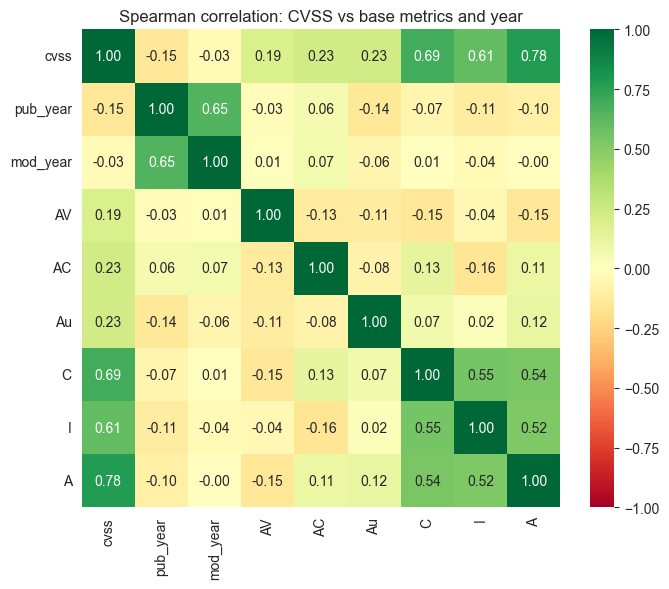

In [20]:
AV_W_F = {k: float(v) for k, v in AV_W.items()}
AC_W_F = {k: float(v) for k, v in AC_W.items()}
AU_W_F = {k: float(v) for k, v in AU_W.items()}
IMPACT_W_F = {k: float(v) for k, v in IMPACT_W.items()}

_df = df

# Build a compact numeric DataFrame
df_corr = pd.DataFrame({
    "cvss": pd.to_numeric(_df["cvss"], errors="coerce"),
    "pub_year": pd.to_datetime(_df["pub_date"], errors="coerce").dt.year,
    "mod_year": pd.to_datetime(_df["mod_date"], errors="coerce").dt.year,
    "AV": _df["access_vector"].astype(str).str.upper().map(AV_W_F),
    "AC": _df["access_complexity"].astype(str).str.upper().map(AC_W_F),
    "Au": _df["access_authentication"].astype(str).str.upper().map(AU_W_F),
    "C":  _df["impact_confidentiality"].astype(str).str.upper().map(IMPACT_W_F),
    "I":  _df["impact_integrity"].astype(str).str.upper().map(IMPACT_W_F),
    "A":  _df["impact_availability"].astype(str).str.upper().map(IMPACT_W_F),
})

# Drop rows with NAs in the variables we correlate (keeps it simple and consistent)
vars_ = ["cvss", "pub_year", "mod_year", "AV", "AC", "Au", "C", "I", "A"]
m = df_corr[vars_].dropna()

# Spearman is appropriate for ordinal-categorical inputs and non-normal targets
corr = m.corr(method="spearman")

# Minimal seaborn heatmap
plt.figure(figsize=(7, 6))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, fmt=".2f", cmap="RdYlGn")
ax.set_title("Spearman correlation: CVSS vs base metrics and year")
plt.tight_layout()
plt.show()

На данный момент топ-3 факторов для `cvss` (коэффициент корреляции):
- A (Availability): $\rho\approx 0.78$
- C (Confidentiality) $\rho\approx 0.69$
- I (Integrity) $\rho\approx 0.61$.

Это согласуется с формулой CVSS v2: компонент Impact (зависит от C/I/A) имеет больший вес (0.6) и даёт самую сильную связь.

- Эксплуатируемость (AV/AC/Au): слабее, но положительно: $\rho\approx 0.19\dots 0.23$.

Логично: Exploitability взвешен ниже (0.4), плюс в данных вариативность этих метрик обычно меньше.

Год публикации (`pub_year`): слабая отрицательная связь с `cvss` ($\rho\approx −0.15$).
Эффект малый; интерпретировать как «незначительное снижение средних баллов со временем» (могут влиять практики оценивания/состав выборки).

Взаимосвязи между C/I/A: умеренные положительные $\rho\approx 0.52\dots 0.55$ — высокий ущерб по одному аспекту часто сопровождается повышением по другим (сопутствующий риск).

Также проверим сформулированные ранее нулевые гипотезы $H_0^{(1)}$, ..., $H_0^{(3)}$:

In [21]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

ALPHA = 0.05

# ---------- H(1): Spearman(cvss, pub_year) ----------
pub_year = pd.to_datetime(df["pub_date"], errors="coerce").dt.year
m1 = df["cvss"].notna() & pub_year.notna()
rho1, p1 = spearmanr(df.loc[m1, "cvss"], pub_year.loc[m1], nan_policy="omit")
print(f"H(1): Spearman(cvss, pub_year) ρ={rho1:.3f}, p={p1:.3g} -> "
      f"{'REJECT H0' if p1 < ALPHA else 'FAIL TO REJECT H0'} at α={ALPHA}")

# ---------- H(2): Spearman(cvss, n_complete) ----------
# Keep rows where all three impact fields are present
imp_cols = ["impact_confidentiality","impact_integrity","impact_availability"]
m2_base = df[imp_cols].notna().all(axis=1) & df["cvss"].notna()

# Count how many of C/I/A are "COMPLETE"
def is_complete(s):  # case-insensitive
    return s.astype(str).str.upper().eq("COMPLETE").astype(int)

n_complete = (is_complete(df["impact_confidentiality"]) +
              is_complete(df["impact_integrity"]) +
              is_complete(df["impact_availability"]))

rho2, p2 = spearmanr(df.loc[m2_base, "cvss"], n_complete.loc[m2_base], nan_policy="omit")
print(f"H(2): Spearman(cvss, n_complete) ρ={rho2:.3f}, p={p2:.3g} -> "
      f"{'REJECT H0' if p2 < ALPHA else 'FAIL TO REJECT H0'} at α={ALPHA}")

# ---------- H(3): Impact==0 => BaseScore==0 ----------
# Impact==0 when C=I=A='NONE'
def is_none(s):  # case-insensitive
    return s.astype(str).str.upper().eq("NONE")

mask_none = m2_base & is_none(df["impact_confidentiality"]) \
                     & is_none(df["impact_integrity"]) \
                     & is_none(df["impact_availability"])

tau = 0.0  # tolerance on cvss (0.0 is the strict invariant for CVSS v2)
k = (df.loc[mask_none, "cvss"] > tau).sum()        # violations
n = int(mask_none.sum())                           # total cases checked

if n == 0:
    print("H(3): no rows with C=I=A='NONE' to test the invariant.")
else:
    if k == 0:
        # Rule of three: upper 95% bound on true violation rate ≈ 3/n
        upper = 3.0 / n
        print(f"H(3): no violations (k=0 of n={n}); "
              f"95% upper bound on violation rate ≈ {upper:.4f} ({upper*100:.2f}%). -> FAIL TO REJECT H0")
    else:
        # Any k>0 falsifies H0:p=0; report observed rate
        rate = k / n
        print(f"H(3): violations found (k={k} of n={n}, rate={rate:.4f} -> {rate*100:.2f}%). -> REJECT H0")

H(1): Spearman(cvss, pub_year) ρ=-0.150, p=0 -> REJECT H0 at α=0.05
H(2): Spearman(cvss, n_complete) ρ=0.640, p=0 -> REJECT H0 at α=0.05
H(3): no violations (k=0 of n=1); 95% upper bound on violation rate ≈ 3.0000 (300.00%). -> FAIL TO REJECT H0


- Гипотеза $H_0^{(1)}$ отвергнута, видим небольшой негативный тренд с течением времени ($\rho \approx -0.15$), что показывает, что `cvss` немного убывает с годом публикации. 
- Гипотеза $H_0^{(2)}$ отвергнута, видим значительный позитивный тренд. Чем больше значений `COMPLETE` среди $C$, $I$, $A$, тем, соответственно, больше Impact и итоговое значение `cvss`
- Гипотеза $H_0^{(3)}$ не отвергнута, слишком мало данных, соответствующих условию, и нет нарушений.

### 2.1.3 Проверка сезонности
Сначала построим несколько диаграмм (ящик с усами), отражающих распределение в каждом месяце:

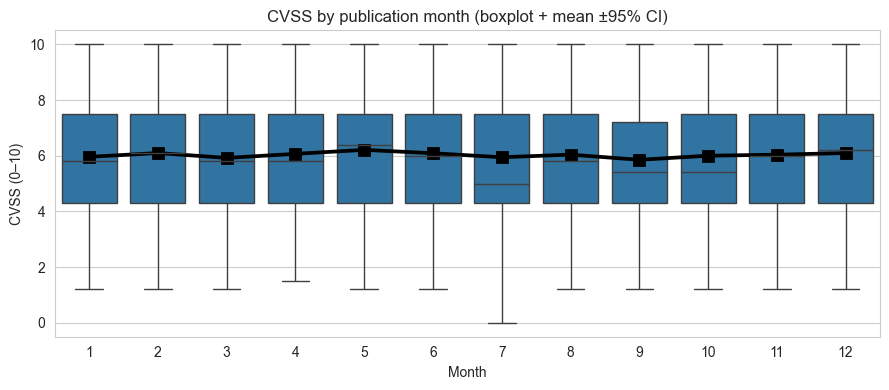

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal

# Build month-of-year and keep rows with valid cvss + month
d = pd.DataFrame({
    "cvss": pd.to_numeric(df["cvss"], errors="coerce"),
    "month": pd.to_datetime(df["pub_date"], errors="coerce").dt.month
}).dropna()

# 1) Visualization: boxplots + monthly means with 95% CI
fig, ax = plt.subplots(figsize=(9, 4))
sns.boxplot(data=d, x="month", y="cvss", ax=ax, showfliers=False)
sns.pointplot(data=d, x="month", y="cvss", errorbar=("ci", 95),
              ax=ax, color="black", markers="s", linestyles="-")
ax.set_title("CVSS by publication month (boxplot + mean ±95% CI)")
ax.set_xlabel("Month")
ax.set_ylabel("CVSS (0–10)")
plt.tight_layout()
plt.show()


Критерий Краскела — Уоллиса используется для проверки на равенство медиан нескольких выборок. Мы можем применить его для сравнения распределений по месяцам.

In [23]:
# 2) Seasonality test: Kruskal–Wallis across 12 month groups
groups = [g["cvss"].values for _, g in d.groupby("month")]
H, p = kruskal(*groups)
k, n = len(groups), len(d)
eps2 = (H - k + 1) / (n - k)  # epsilon-squared effect size

print(f"Kruskal–Wallis: H={H:.2f}, p={p:.3g}, epsilon^2={eps2:.3f} (k={k}, n={n})")
print(f"Month is statistically {'' if p < ALPHA else 'in'}significant with significance level {ALPHA:.2f}")


Kruskal–Wallis: H=138.66, p=3.06e-24, epsilon^2=0.001 (k=12, n=89660)
Month is statistically significant with significance level 0.05


Замечаем статистически значимую разницу `cvss` по месяцам (т. к. $p > \alpha$), видим, что в июле (7-й месяц) медиана существенно меньше, чем в других месяцах. Но практический эффект незначительный (т. к. очень маленькое значение $\varepsilon^2 = 0.001$)